- The goal of the project is to analyze sentiments of people who wrote the comments.
- After getting the data on emotions of people who wrote the commentt, I will analyze if there are differences in selection process given a category of article.(example, Business, News, News analysis , Editorial and etc). This analysis should show if more negative or positive comments are systematically chosen by editors given the topic of the conversation. 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
from nltk import tokenize
# package to split strings to sentences
import nltk.data

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

## ROBERTA
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
# Read in data
df = pd.read_csv("/kaggle/input/nyt-comments/CommentsApril2017.csv")

## Dropping column 'userURL' and 'userTitle'. 
df = df.drop(columns=['userURL', 'userTitle'])

## wanted to choose randomly but df.sample have problems with mathematical operations 
df1 = df.loc[df["editorsSelection"]== True][0:2500]

# resetting the indexes
df2 = df1.reset_index(drop = True)


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
# Downloading the Twitter ROBERTA base sentiment
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
# Function that gets sentiments from each comment
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
# Iterating through whole dataset 
# Takes a bit of time for calculation
rows = []
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    roberta_result = polarity_scores_roberta(df2["commentBody"][i])
    rows.append(roberta_result)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [31]:
roberta_pandas_dataframe = pd.DataFrame.from_dict(rows, orient='columns')

df3 = pd.concat([df2, roberta_pandas_dataframe], axis=1)

Text(0.5, 1.0, 'News')

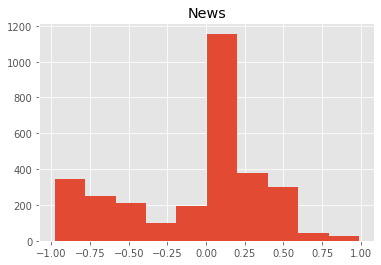

In [40]:

data = df3[['roberta_neg', 'roberta_neu', 'roberta_pos','editorsSelection','typeOfMaterial']]

news_data = data.loc[data["typeOfMaterial"] == "News"]

d = []
for i in news_data['roberta_neg']:
    d.append(-i)

for i in news_data['roberta_neu']:
    d.append(i)

for i in news_data['roberta_pos']:
    d.append(i)

plt.hist(d)
plt.title("News")

 - There is big cluster on 0, showing that more neutral comments are chosen by editors. 
 - Also, it can be seen that there are a lot more highly negative comments that were chosen rather than positive ones.  

(array([ 348.,  355.,  212.,  124.,  262., 1225.,  553.,  318.,   56.,
          21.]),
 array([-0.97309238, -0.77674102, -0.58038965, -0.38403829, -0.18768693,
         0.00866443,  0.20501579,  0.40136715,  0.59771851,  0.79406987,
         0.99042124]),
 <BarContainer object of 10 artists>)

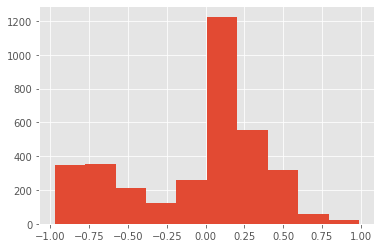

In [41]:
# Op-ed
oped_data = data.loc[data["typeOfMaterial"] == "Op-Ed"]

d = []

for i in oped_data['roberta_neg']:
    d.append(-i)

for i in oped_data['roberta_neu']:
    d.append(i)

for i in oped_data['roberta_pos']:
    d.append(i)
    
plt.hist(d)

(array([ 76.,  73.,  57.,  26.,  15., 283., 111.,  88.,  16.,   5.]),
 array([-0.97691   , -0.78772714, -0.59854428, -0.40936142, -0.22017856,
        -0.0309957 ,  0.15818716,  0.34737002,  0.53655288,  0.72573574,
         0.9149186 ]),
 <BarContainer object of 10 artists>)

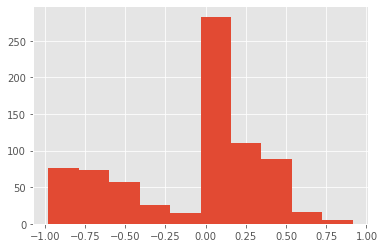

In [42]:
#'Editorial'

edit_data = data.loc[data["typeOfMaterial"] == "Editorial"]

d = []

for i in edit_data['roberta_neg']:
    d.append(-i)

for i in edit_data['roberta_neu']:
    d.append(i)

for i in edit_data['roberta_pos']:
    d.append(i)
    
plt.hist(d)


(array([3., 1., 0., 4., 4., 3., 5., 0., 3., 1.]),
 array([-0.44674543, -0.31779418, -0.18884293, -0.05989168,  0.06905957,
         0.19801082,  0.32696207,  0.45591331,  0.58486456,  0.71381581,
         0.84276706]),
 <BarContainer object of 10 artists>)

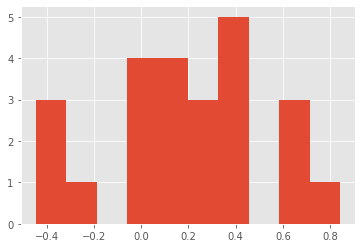

In [43]:
#'Obituary(Obit)'

obit= data.loc[data["typeOfMaterial"] == "Obituary (Obit)"]

d = []

for i in obit['roberta_neg']:
    d.append(-i)

for i in obit['roberta_neu']:
    d.append(i)

for i in obit['roberta_pos']:
    d.append(i)
    
plt.hist(d)


(array([18., 20., 16.,  8.,  3.,  1., 78., 24., 21.,  9.]),
 array([-0.95768213, -0.79949273, -0.64130332, -0.48311392, -0.32492452,
        -0.16673511, -0.00854571,  0.1496437 ,  0.3078331 ,  0.4660225 ,
         0.62421191]),
 <BarContainer object of 10 artists>)

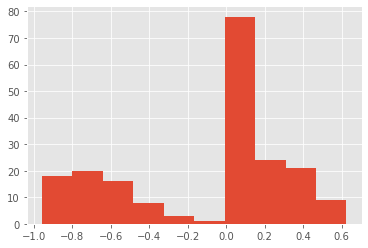

In [44]:
#'Obituary(Obit)'

o= data.loc[data["typeOfMaterial"] == "News Analysis"]

d = []

for i in o['roberta_neg']:
    d.append(-i)

for i in o['roberta_neu']:
    d.append(i)

for i in o['roberta_pos']:
    d.append(i)
    
plt.hist(d)


(array([ 8.,  2.,  2.,  3.,  0.,  0., 12., 11.,  3.,  4.]),
 array([-0.88497537, -0.74389277, -0.60281016, -0.46172755, -0.32064494,
        -0.17956233, -0.03847972,  0.10260289,  0.2436855 ,  0.3847681 ,
         0.52585071]),
 <BarContainer object of 10 artists>)

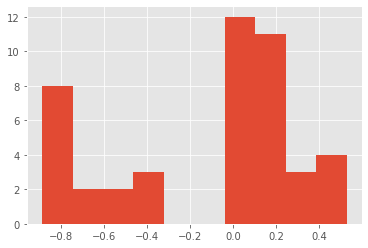

In [45]:
blog= data.loc[data["typeOfMaterial"] == "Blog"]

d = []

for i in blog['roberta_neg']:
    d.append(-i)

for i in blog['roberta_neu']:
    d.append(i)

for i in blog['roberta_pos']:
    d.append(i)
    
plt.hist(d)


- It can be seen that comments that are highly positive are less likely to be chosen. 